In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qutip as qt

import sim_utils as su

MHz = 1. # work in units of MHz
dt = 0.01 # simulation time step

When instantiating a KCQ object, we can set the system parameters without modifying the `sim_utils.py` file. For instance, setting the `n_th` parameter to 0 rather than its default value of 0.04:

In [2]:
kcq = su.KCQ(n_th=0.)

To simulate the initialization with a wait time of 200 ns afterwards, first without photon loss:

In [3]:
kcq.add_identity_gate(0.2 / MHz) # add a "gate" that does nothing for 200 ns

t = np.arange(0., kcq.t0, dt) # time values at which to return expectation values

result = qt.mesolve(kcq.H,
                    kcq.thermal_state(), # begin in a thermal state, though since n_th=0 this is a pure ground state
                    t,
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()], # expectation value operators
                    options=qt.Options(store_states=False, store_final_state=True))

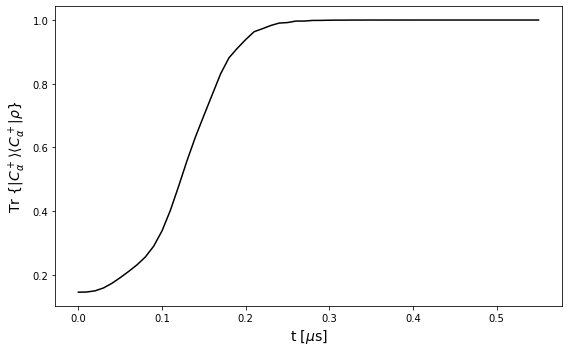

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=14)
plt.tight_layout()

Now running the same thing *with* single-photon loss:

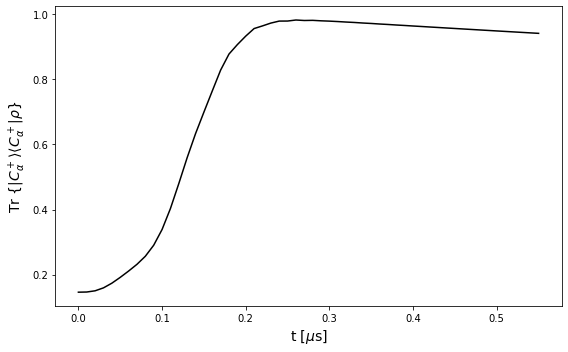

In [5]:
result = qt.mesolve(kcq.H,
                    kcq.thermal_state(),
                    t,
                    c_ops=kcq.loss_terms(), # operators corresponding to the loss terms in the Lindblad master equation
                    e_ops=[psi * psi.dag() for psi in kcq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black")

plt.xlabel("t [$\mu$s]", fontsize=14)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=14)
plt.tight_layout()